# 6.6 Sourcing & Analyzing Time Series Data (task)

### This script contains the following:

#### 1. Importing your libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Stationarizing the Federal Reserve Economic Data

### 1. Importing your libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = "/Users/auralynnrosario/Documents/11-2025 Gun Violence Analysis"

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data','Prepared Data','gun_violence_checked.csv'))

In [5]:
df.shape

(239677, 24)

In [6]:
df.head()

,Unnamed: 0,incident_id,date,state,city_or_county,n_killed,n_injured,congressional_district,gun_stolen,gun_type,...,participant_age_group,participant_gender,participant_status,participant_type,state_house_district,state_senate_district,guns_count_known,congressional_known,state_house_known,state_senate_known
0,0,461105,2013-01-01,Pennsylvania,Mckeesport,0,4,14.0,Unknown,Unknown,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,NaN,NaN,0,1,0,0
1,1,460726,2013-01-01,California,Hawthorne,1,3,43.0,Unknown,Unknown,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,62.0,35.0,0,1,1,1
2,2,478855,2013-01-01,Ohio,Lorain,1,3,9.0,0::Unknown||1::Unknown,0::Unknown||1::Unknown,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,56.0,13.0,1,1,1,1
3,3,478925,2013-01-05,Colorado,Aurora,4,0,6.0,Unknown,Unknown,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,40.0,28.0,0,1,1,1
4,4,478959,2013-01-07,North Carolina,Greensboro,2,2,6.0,0::Unknown||1::Unknown,0::Handgun||1::Handgun,...,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,62.0,27.0,1,1,1,1


In [7]:
df = df.drop(columns=['Unnamed: 0'])

In [8]:
df.head()

,incident_id,date,state,city_or_county,n_killed,n_injured,congressional_district,gun_stolen,gun_type,incident_characteristics,...,participant_age_group,participant_gender,participant_status,participant_type,state_house_district,state_senate_district,guns_count_known,congressional_known,state_house_known,state_senate_known
0,461105,2013-01-01,Pennsylvania,Mckeesport,0,4,14.0,Unknown,Unknown,Shot - Wounded/Injured||Mass Shooting (4+ vict...,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,NaN,NaN,0,1,0,0
1,460726,2013-01-01,California,Hawthorne,1,3,43.0,Unknown,Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,62.0,35.0,0,1,1,1
2,478855,2013-01-01,Ohio,Lorain,1,3,9.0,0::Unknown||1::Unknown,0::Unknown||1::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,56.0,13.0,1,1,1,1
3,478925,2013-01-05,Colorado,Aurora,4,0,6.0,Unknown,Unknown,"Shot - Dead (murder, accidental, suicide)||Off...",...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,40.0,28.0,0,1,1,1
4,478959,2013-01-07,North Carolina,Greensboro,2,2,6.0,0::Unknown||1::Unknown,0::Handgun||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",...,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,62.0,27.0,1,1,1,1


In [9]:
df.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'n_killed',
       'n_injured', 'congressional_district', 'gun_stolen', 'gun_type',
       'incident_characteristics', 'latitude', 'longitude', 'n_guns_involved',
       'participant_age_group', 'participant_gender', 'participant_status',
       'participant_type', 'state_house_district', 'state_senate_district',
       'guns_count_known', 'congressional_known', 'state_house_known',
       'state_senate_known'],
      dtype='object')

**Question 2 - Find a data set to work and import it into your Jupyter notebook.**
My project data set already contains time-series data so there's no need to find a new data set.

### 2. Subsetting, wrangling, and cleaning time-series data

**Question 3 - Make a subset of your data set if necessary. You'll need to set the “Date” column as your index in the new dataframe.**

In [10]:
# Check the minimum and maximum date in the dataset to decide if I want a subset

df["date"].min(), df["date"].max()

('2013-01-01', '2018-03-31')

The dataset covers incidents from January 1, 2013 to March 31, 2018. For clean time-series analysis, I will focus on full calendar years (2013–2017) and exclude the partial year 2018, which could distort yearly and seasonal patterns.

In [11]:
df["date"] = pd.to_datetime(df["date"])

In [12]:
# Subset to full years only (2013-01-01 to 2017-12-31)

df_full_years = df[(df["date"] >= "2013-01-01") & (df["date"] <= "2017-12-31")]

In [14]:
# "Date" in this dataframe is treated as a column/variable and not an index. I will set the "Date" column as the index.

from datetime import datetime

df_full_years['datetime'] = pd.to_datetime(df_full_years['date']) # Create a datetime column from "Date.""
df_full_years = df_full_years.set_index('datetime') # Set the datetime as the index of the dataframe.
df_full_years.drop(['date'], axis=1, inplace=True) # Drop the "Date" column.
df_full_years.head()

,incident_id,state,city_or_county,n_killed,n_injured,congressional_district,gun_stolen,gun_type,incident_characteristics,latitude,...,participant_age_group,participant_gender,participant_status,participant_type,state_house_district,state_senate_district,guns_count_known,congressional_known,state_house_known,state_senate_known
datetime,,,,,,,,,,,,,,,,,,,,,
2013-01-01,461105,Pennsylvania,Mckeesport,0,4,14.0,Unknown,Unknown,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,NaN,NaN,0,1,0,0
2013-01-01,460726,California,Hawthorne,1,3,43.0,Unknown,Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",33.9090,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,62.0,35.0,0,1,1,1
2013-01-01,478855,Ohio,Lorain,1,3,9.0,0::Unknown||1::Unknown,0::Unknown||1::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",41.4455,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,56.0,13.0,1,1,1,1
2013-01-05,478925,Colorado,Aurora,4,0,6.0,Unknown,Unknown,"Shot - Dead (murder, accidental, suicide)||Off...",39.6518,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,40.0,28.0,0,1,1,1
2013-01-07,478959,North Carolina,Greensboro,2,2,6.0,0::Unknown||1::Unknown,0::Handgun||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",36.1140,...,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,62.0,27.0,1,1,1,1


In [18]:
# 1. Count incidents per day

daily_counts = df_full_years.resample("D").size()

**Question 4 - Create a line chart of your data.**

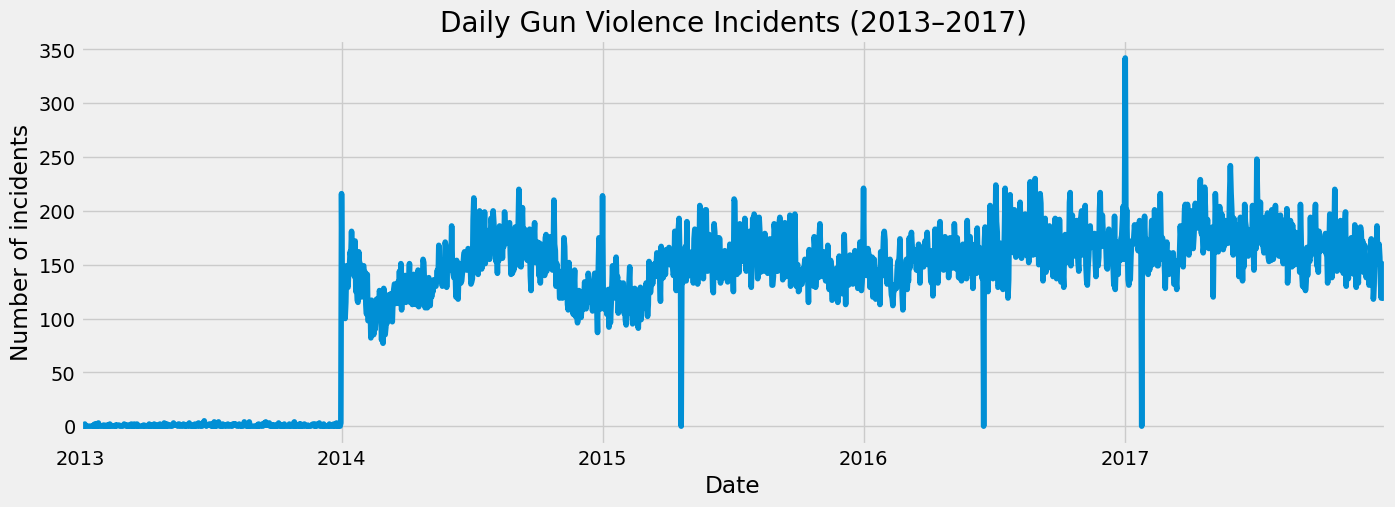

In [25]:
# Plot the new data set

daily_counts.plot(figsize=(15,5))
plt.title("Daily Gun Violence Incidents (2013–2017)")
plt.xlabel("Date")
plt.ylabel("Number of incidents")
plt.show()  

In [26]:
# Check for missing values

df_full_years.isnull().sum() 

incident_id                     0
state                           0
city_or_county                  0
n_killed                        0
n_injured                       0
congressional_district       8498
gun_stolen                      0
gun_type                        0
incident_characteristics        0
latitude                     6342
longitude                    6342
n_guns_involved             99442
participant_age_group           0
participant_gender              0
participant_status              0
participant_type                0
state_house_district        35326
state_senate_district       28889
guns_count_known                0
congressional_known             0
state_house_known               0
state_senate_known              0
dtype: int64

In [27]:
# Check for duplicates

dups = df_full_years.duplicated()
dups.sum()

# No dups!

np.int64(0)

### 3. Time-series analysis: decomposition

**Question 5 - Decompose the data’s components.Analyze the results from the plot in a markdown cell.**

In [29]:
# Decompose the time series using an additive model

from statsmodels.tsa.seasonal import seasonal_decompose

# Aggregate to weekly counts

weekly_counts = daily_counts.resample("W").sum()

In [30]:
# 2. Decompose using an additive model
#  period=52 ≈ number of weeks in a year

decomposition = seasonal_decompose(weekly_counts, model="additive", period=52)

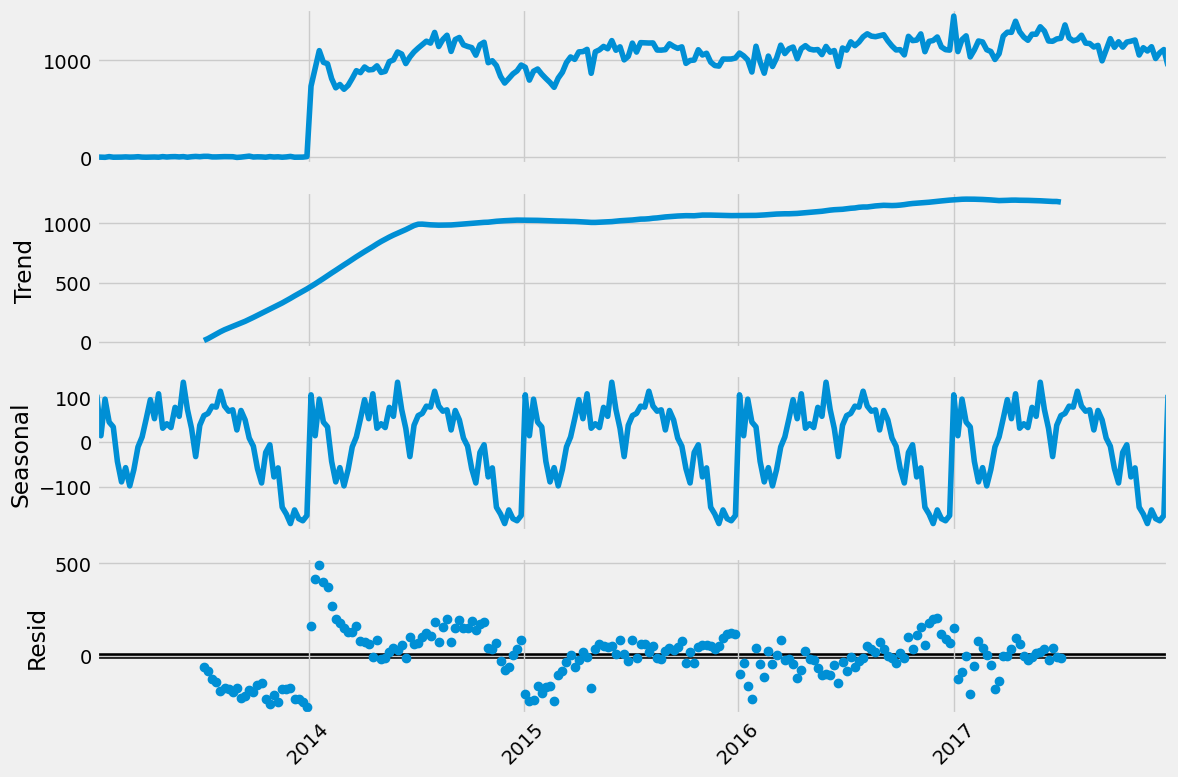

In [32]:
import matplotlib.dates as mdates

fig = decomposition.plot()   # your existing line

# 1. Make the whole figure bigger
fig.set_size_inches(12, 8)

# 2. Rotate x-axis labels on all subplots
for ax in fig.axes:
    ax.tick_params(axis="x", rotation=45)

    # 3. OPTIONAL: only show one tick per year
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()


I turned the data into weekly counts and ran an additive time series decomposition. The trend part shows a big jump around 2014 and then a steady increase in weekly gun violence incidents up to about 2016–2017. My guess is that the sudden jump is more about changes in how the data was recorded than a real overnight change in violence.

The seasonal part shows a pattern that repeats every year. Some weeks tend to have more incidents, and some weeks tend to have fewer, and this pattern keeps coming back each year. The residuals (what’s left over) mostly stay close to zero, which tells me the model is doing a decent job and the remaining points are just random ups and downs.

### 4. Testing for stationarity

**Question 6 - Conduct a Dickey-Fuller test to check for stationarity.
Interpret the results in a markdown cell and reference your null hypothesis.**


In [34]:
# Turn weekly_counts into a DataFrame with a 'Value' column
data_sub = weekly_counts.to_frame(name='Value')

# Apply the Dickey-Fuller test on the weekly series
dickey_fuller(data_sub['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                  -1.999919
p-value                          0.286609
Number of Lags Used              5.000000
Number of Observations Used    255.000000
Critical Value (1%)             -3.456257
Critical Value (5%)             -2.872942
Critical Value (10%)            -2.572846
dtype: float64


I used the Augmented Dickey–Fuller test to check whether the weekly gun violence time series is stationary.

**Null hypothesis (H₀):** The series is not stationary (it has a unit root).  
The test returned a test statistic of -1.9999 and a p-value of 0.2866. Since the p-value is much larger than 0.05, I fail to reject the null hypothesis. This suggests that the weekly incident counts are not stationary in their current form and still contain trend or other time-dependent structure. 

**Question 7 - If your data isn’t stationary, conduct a round of differencing on it and repeat step 6.**

### 5. Stationarizing the Gun Violence Data 

In [36]:
# Make the series stationary by differencing:
data_diff = data_sub - data_sub.shift(1)  # t - (t-1)
data_diff = data_diff.dropna()            # drop the first NaN row

In [37]:
# Check stationarity again on the differenced series
dickey_fuller(data_diff['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                -9.297035e+00
p-value                        1.138793e-15
Number of Lags Used            4.000000e+00
Number of Observations Used    2.550000e+02
Critical Value (1%)           -3.456257e+00
Critical Value (5%)           -2.872942e+00
Critical Value (10%)          -2.572846e+00
dtype: float64


To prepare the data for forecasting, I first needed a **stationary** time series. 
Stationary basically means that the average level and the spread of the data stay 
roughly the same over time (no strong trend going up or down).

To do this, I created a new series using **first differencing**. Instead of looking 
at the raw weekly incident counts, I looked at how much the number of incidents 
changed from one week to the next (current week minus previous week).

Then I ran the Augmented Dickey–Fuller (ADF) test on this differenced series.

- **Null hypothesis (H₀):** the differenced series is **not** stationary.  
- **Test statistic:** about -9.30  
- **p-value:** 1.14e-15 (this is basically 0 and much smaller than 0.05)

A very small p-value means that, if the series were really not stationary, it would 
be extremely unlikely to see results like this. Because the p-value is so tiny, I 
can reject the null hypothesis and say that my differenced weekly series is now 
**stationary**. This makes it more suitable for time-series forecasting models.

**Question 9 - Check your data’s autocorrelations.**

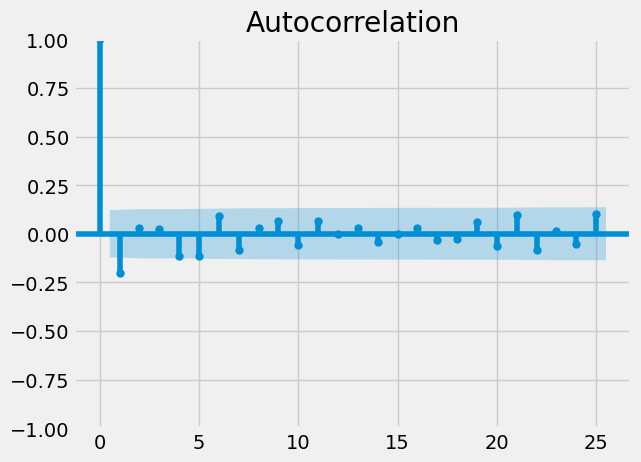

In [38]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(data_diff['Value'])   # use the 'Value' column
plt.show()

I plotted the autocorrelation function (ACF) for the differenced weekly series to see if the changes from week to week are still related to past values.

The big bar at lag 0 is expected and just shows the series compared with itself. At lag 1, there is a small negative bar just outside the blue confidence band, which means this week’s change is slightly related to last week’s change. For lags 2 and higher, all the bars are small and stay inside the blue band, so there is no strong autocorrelation left. This tells me that after differencing, the weekly series mostly behaves like random noise with only a small short-term effect from the previous week.

